<a href="https://colab.research.google.com/github/Brads-2005/Spam-Detection/blob/main/SpamLogisticRegg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries



In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report,roc_curve, auc, RocCurveDisplay

Importing Dataset

In [68]:
df=pd.read_csv('/content/spambase.csv')

Preprocessing

In [69]:
df.shape

(4601, 58)

In [70]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [71]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [72]:
df.isnull().sum()

,0
word_freq_make,0
word_freq_address,0
word_freq_all,0
word_freq_3d,0
word_freq_our,0
word_freq_over,0
word_freq_remove,0
word_freq_internet,0
word_freq_order,0
word_freq_mail,0


In [73]:
target_corr = df.corr()['Class'].abs().sort_values(ascending=True)

In [74]:
print(target_corr)

word_freq_will                0.007741
word_freq_address             0.030224
word_freq_parts               0.031035
word_freq_table               0.044679
word_freq_3d                  0.057371
char_freq_;                   0.059630
word_freq_report              0.060027
char_freq_[                   0.064709
word_freq_direct              0.064801
char_freq_#                   0.065067
word_freq_conference          0.084020
char_freq_(                   0.089672
word_freq_font                0.091860
word_freq_project             0.094594
word_freq_cs                  0.097375
capital_run_length_average    0.109999
word_freq_415                 0.112754
word_freq_857                 0.114214
word_freq_data                0.119931
word_freq_pm                  0.122831
word_freq_make                0.126208
word_freq_telnet              0.126912
word_freq_people              0.132927
word_freq_lab                 0.133523
word_freq_original            0.135664
word_freq_technology     

In [75]:
cols_to_drop = target_corr[target_corr < 0.1].index.tolist()
df.drop(columns=cols_to_drop, inplace=True)

In [76]:
df.shape

(4601, 43)

In [77]:
X=df.drop('Class',axis=1)
y=df['Class']

In [78]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Preparing Model

In [79]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=40)

In [80]:
X_train.shape,X_test.shape

((3680, 42), (921, 42))

In [81]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [82]:
model.score(X_test,y_test)

0.9239956568946797

In [90]:
y_pred=model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

Evaluation metrics

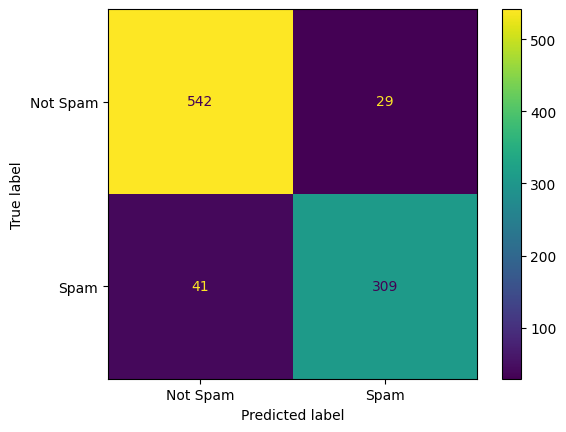

In [87]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Not Spam','Spam'])
disp.plot()

plt.show()

In [88]:
print(classification_report(y_test, y_pred,target_names=['Not Spam','Spam']))

              precision    recall  f1-score   support

    Not Spam       0.93      0.95      0.94       571
        Spam       0.91      0.88      0.90       350

    accuracy                           0.92       921
   macro avg       0.92      0.92      0.92       921
weighted avg       0.92      0.92      0.92       921



In [91]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

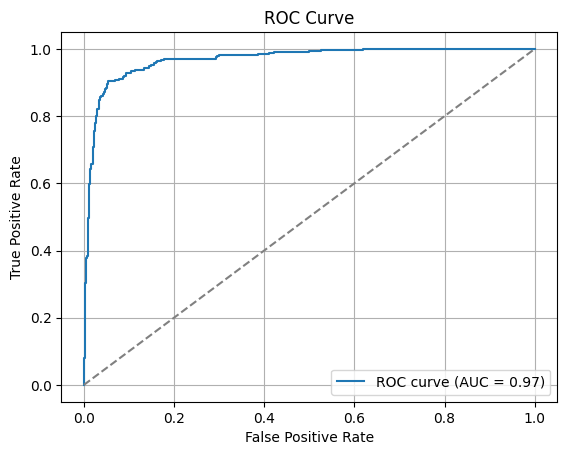

In [93]:
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()